In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [4]:
data_1 = pd.read_csv('./genome_scores.csv')
data_2 = pd.read_csv('./genome_tags.csv')
data_3 = pd.read_csv('./link.csv')
data_4 = pd.read_csv('./movie.csv')
data_5 = pd.read_csv('./rating.csv')
data_6 = pd.read_csv('./tag.csv')

In [5]:
data = pd.merge(data_5, data_4, how='left', on = 'movieId')
data = data.drop_duplicates()
data = pd.merge(data, data_3, how='left', on = 'movieId')


data = data.head(100000)


data['binary_rating'] = np.where(data['rating'] >= 4, 1, 0)

data = data.drop(columns=['timestamp'])

In [6]:
avg_user_rating =  data.groupby('userId')['rating'].mean()
data = data.merge(avg_user_rating, how='left', on = 'userId')
data = data.rename(columns={'rating_y': 'avg_user_rating', 'rating_x': 'rating'})

avg_movie_rating =  data.groupby('movieId')['rating'].mean()
data = data.merge(avg_movie_rating, how='left', on = 'movieId')
data = data.rename(columns={'rating_y': 'avg_movie_rating', 'rating_x': 'rating'})


avg_genre_rating = data.groupby('genres')['rating'].mean()
data = data.merge(avg_genre_rating, how='left', on = 'genres')
data = data.rename(columns={'rating_y': 'avg_genre_rating', 'rating_x': 'rating'})

data['average_rating'] = data['rating'].mean()

In [7]:
data

,userId,movieId,rating,title,genres,imdbId,tmdbId,binary_rating,avg_user_rating,avg_movie_rating,avg_genre_rating,average_rating
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,0,3.742857,3.250000,3.306872,3.507605
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,112682,902.0,0,3.742857,3.872093,3.872093,3.507605
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,114746,63.0,0,3.742857,3.831818,3.782456,3.507605
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,0,3.742857,4.009346,3.974152,3.507605
4,1,50,3.5,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,0,3.742857,4.337054,4.035509,3.507605
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,702,1373,3.0,Star Trek V: The Final Frontier (1989),Action|Sci-Fi,98382,172.0,0,2.818841,2.986842,3.259071,3.507605
99996,702,1374,2.5,Star Trek II: The Wrath of Khan (1982),Action|Adventure|Sci-Fi|Thriller,84726,154.0,0,2.818841,3.694805,3.443520,3.507605
99997,702,1377,1.5,Batman Returns (1992),Action|Crime,103776,364.0,0,2.818841,2.868421,3.289409,3.507605
99998,702,1378,1.5,Young Guns (1988),Action|Comedy|Western,96487,11967.0,0,2.818841,3.230769,3.226190,3.507605


In [8]:
data['binary_rating'] = np.where(data['rating'] >= 4, 1, 0)
data

,userId,movieId,rating,title,genres,imdbId,tmdbId,binary_rating,avg_user_rating,avg_movie_rating,avg_genre_rating,average_rating
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,0,3.742857,3.250000,3.306872,3.507605
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,112682,902.0,0,3.742857,3.872093,3.872093,3.507605
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,114746,63.0,0,3.742857,3.831818,3.782456,3.507605
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,0,3.742857,4.009346,3.974152,3.507605
4,1,50,3.5,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,0,3.742857,4.337054,4.035509,3.507605
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,702,1373,3.0,Star Trek V: The Final Frontier (1989),Action|Sci-Fi,98382,172.0,0,2.818841,2.986842,3.259071,3.507605
99996,702,1374,2.5,Star Trek II: The Wrath of Khan (1982),Action|Adventure|Sci-Fi|Thriller,84726,154.0,0,2.818841,3.694805,3.443520,3.507605
99997,702,1377,1.5,Batman Returns (1992),Action|Crime,103776,364.0,0,2.818841,2.868421,3.289409,3.507605
99998,702,1378,1.5,Young Guns (1988),Action|Comedy|Western,96487,11967.0,0,2.818841,3.230769,3.226190,3.507605


In [9]:
def clean_row(row):
    row = row.split('|')
    return row 

data['genres'] = data['genres'].apply(lambda row: clean_row(row))

data = data.drop('genres', 1).join(data.genres.str.join('|').str.get_dummies())
data

C:\Users\SESA63~1\AppData\Local\Temp/ipykernel_14760/929381475.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('genres', 1).join(data.genres.str.join('|').str.get_dummies())


,userId,movieId,rating,title,imdbId,tmdbId,binary_rating,avg_user_rating,avg_movie_rating,avg_genre_rating,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,2,3.5,Jumanji (1995),113497,8844.0,0,3.742857,3.250000,3.306872,...,0,0,0,0,0,0,0,0,0,0
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",112682,902.0,0,3.742857,3.872093,3.872093,...,0,0,0,0,1,0,1,0,0,0
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),114746,63.0,0,3.742857,3.831818,3.782456,...,0,0,0,0,1,0,1,1,0,0
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),114369,807.0,0,3.742857,4.009346,3.974152,...,0,0,0,0,1,0,0,1,0,0
4,1,50,3.5,"Usual Suspects, The (1995)",114814,629.0,0,3.742857,4.337054,4.035509,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,702,1373,3.0,Star Trek V: The Final Frontier (1989),98382,172.0,0,2.818841,2.986842,3.259071,...,0,0,0,0,0,0,1,0,0,0
99996,702,1374,2.5,Star Trek II: The Wrath of Khan (1982),84726,154.0,0,2.818841,3.694805,3.443520,...,0,0,0,0,0,0,1,1,0,0
99997,702,1377,1.5,Batman Returns (1992),103776,364.0,0,2.818841,2.868421,3.289409,...,0,0,0,0,0,0,0,0,0,0
99998,702,1378,1.5,Young Guns (1988),96487,11967.0,0,2.818841,3.230769,3.226190,...,0,0,0,0,0,0,0,0,0,1


In [10]:
data_t_train = data.drop(columns=['userId', 'movieId', 'title', 'rating', 'imdbId', 'tmdbId'])
data

,userId,movieId,rating,title,imdbId,tmdbId,binary_rating,avg_user_rating,avg_movie_rating,avg_genre_rating,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,2,3.5,Jumanji (1995),113497,8844.0,0,3.742857,3.250000,3.306872,...,0,0,0,0,0,0,0,0,0,0
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",112682,902.0,0,3.742857,3.872093,3.872093,...,0,0,0,0,1,0,1,0,0,0
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),114746,63.0,0,3.742857,3.831818,3.782456,...,0,0,0,0,1,0,1,1,0,0
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),114369,807.0,0,3.742857,4.009346,3.974152,...,0,0,0,0,1,0,0,1,0,0
4,1,50,3.5,"Usual Suspects, The (1995)",114814,629.0,0,3.742857,4.337054,4.035509,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,702,1373,3.0,Star Trek V: The Final Frontier (1989),98382,172.0,0,2.818841,2.986842,3.259071,...,0,0,0,0,0,0,1,0,0,0
99996,702,1374,2.5,Star Trek II: The Wrath of Khan (1982),84726,154.0,0,2.818841,3.694805,3.443520,...,0,0,0,0,0,0,1,1,0,0
99997,702,1377,1.5,Batman Returns (1992),103776,364.0,0,2.818841,2.868421,3.289409,...,0,0,0,0,0,0,0,0,0,0
99998,702,1378,1.5,Young Guns (1988),96487,11967.0,0,2.818841,3.230769,3.226190,...,0,0,0,0,0,0,0,0,0,1


In [11]:
data_t_train.columns

Index(['binary_rating', 'avg_user_rating', 'avg_movie_rating',
       'avg_genre_rating', 'average_rating', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [12]:
data_t_train = data_t_train.drop(columns=[ 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

In [13]:
data_t_train = data_t_train.dropna()

In [14]:
from sklearn.model_selection import train_test_split

X = data_t_train.drop('binary_rating', axis=1)
Y = data_t_train['binary_rating']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [15]:
from sklearn import ensemble

gbr = ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.01, max_depth=5, n_estimators = 1100)
gbr.fit(X_train,y_train)
gbr_pred = gbr.predict(X_test)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, gbr_pred))
print('MSE:', metrics.mean_squared_error(y_test, gbr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr_pred)))

C:\Users\SESA639350\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MAE: 0.7231605547223903
MSE: 0.7227586138915628
RMSE: 0.8501521122079053


In [16]:
data_t_train.columns

Index(['binary_rating', 'avg_user_rating', 'avg_movie_rating',
       'avg_genre_rating', 'average_rating'],
      dtype='object')

Feature: 0, Score: 0.42128
Feature: 1, Score: 0.56353
Feature: 2, Score: 0.01518
Feature: 3, Score: 0.00000


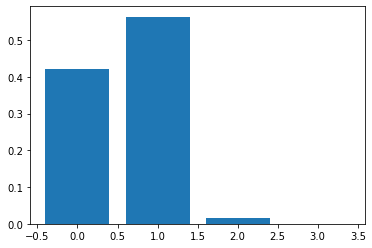

In [20]:

from xgboost import XGBRegressor
from matplotlib import pyplot


# get importance
importance = gbr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [19]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


The focus I was trying to give within this excercise was creating features that provided a certain estimate properly compare other users to each user, and with this having a better
and close understanding of what a user is going to like, and ultimately drive the decision of rating higher a certain movie. 

However, due to time constraints linked by my current job (as well as the limited computer power, sufficient to handle large datasets) I was not able
to properly perform a cosine similarity. The idea behind doing a CS was to obtain for each user, a set of 10 or so, closely related users that
would help me generate more features for each row. Like the score given by Similar User 1, 2, etc. (SC1, SC2, SC3, SC4, SC5). With these, 
I would be able to closely relate the users with other users that have watched the same types of movies and get the rating that others obtained. 

Another feature I decided to create was an average of rating grouped by user, by movie genre and by the movie itself. 
I separated the genres into labels as features, but this can prove to be "too much" for the model. 

Also, I could have thought that tags could be used to perform a more complete analysis by means of NLP. 

In [21]:
data_6.groupby('movieId')['tag'].apply(list)

movieId
1         [Watched, computer animation, Disney animated ...
2         [time travel, adapted from:book, board game, c...
3         [old people that is actually funny, sequel fev...
4         [chick flick, revenge, characters, chick flick...
5         [Diane Keaton, family, sequel, Steve Martin, w...
                                ...                        
131054                                          [dinosaurs]
131082                        [documentary, Yoshitomo Nara]
131164                                        [Vietnam War]
131170                                  [alternate reality]
131258             [bandits, Korea, mutiny, pirates, whale]
Name: tag, Length: 19545, dtype: object

This could help us further determine what are the tags that provide a user with a basis for a higher rating. And map those words to the users to evaluate 
if a new movie, with this tags, will provide a better score, and likened to this user, how much specifically will this user give it. 


I would have love to have more time, but work, as well as a minor health issue (dentist) operation, severely limited the scope of my work. 
I appreciate your time! 